# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
cities_country = []
latitudes = []
longitudes = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityname = city.city_name
    countryname = city.country_code
    city_with_country = tuple([cityname, countryname.upper()])
    if city_with_country not in cities_country:
        cities_country.append(city_with_country)
        cities.append(city_with_country[0])
        countries.append(city_with_country[1])
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])

# Print the city count to confirm sufficient count    
totalcities = len(cities_country)
print(f"Total cities are: {totalcities}")

Total cities are: 603


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
dict = {"City": cities, "Country": countries, "Latitude":latitudes, "Longitudes": longitudes}
city_data = pd.DataFrame(dict)
city_data
city_data["Country"]  = np.nan
city_data["Latitude"]  = np.nan
city_data["Longitudes"]  = np.nan
city_data["Max_Temprature(F)"]  = np.nan
city_data["Humidity(%)"]  = np.nan
city_data["Windspeed(MPH)"]  = np.nan
city_data["Cloudiness(%)"]  = np.nan
city_data["Date"] = np.nan
city_data.head()

,City,Country,Latitude,Longitudes,Max_Temprature(F),Humidity(%),Windspeed(MPH),Cloudiness(%),Date
0,katsuura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kodiak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,punta arenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,grand river south east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hasaki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data = []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# cities = ["Paris", "London", "Oslo", "Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities[:100]:
#for index, row in city_data.iterrows():
    response = requests.get(query_url + city).json()
    counter=counter+1
        
    try:
        #print(response)
        max_temp=response['main']['temp_max']
       # print(temp)
        country=response['sys']['country']
        #print(country)
        longitude=response['coord']['lon']
        latitude=response['coord']['lat']
        humidity=response['main']['humidity'] 
        wind_speed=response['wind']['speed']
        cloudiness=response['clouds']['all']
        date=response['dt']
        data.append([city,country,latitude,longitude,max_temp,humidity,wind_speed,cloudiness,date])
        print(f"Processing {counter} of {totalcities}: {city}")
        time.sleep(.5)
    except:
        print('City not found...skipping')

Processing 1 of 603: katsuura
Processing 2 of 603: kodiak
Processing 3 of 603: punta arenas
City not found...skipping
Processing 5 of 603: hasaki
Processing 6 of 603: vaini
Processing 7 of 603: cape town
Processing 8 of 603: bethel
Processing 9 of 603: hilo
Processing 10 of 603: portree
Processing 11 of 603: jamestown
Processing 12 of 603: norman wells
Processing 13 of 603: la ronge
City not found...skipping
Processing 15 of 603: puerto ayora
Processing 16 of 603: lorengau
Processing 17 of 603: vite
Processing 18 of 603: sakakah
Processing 19 of 603: goderich
Processing 20 of 603: chililabombwe
Processing 21 of 603: upernavik
Processing 22 of 603: husavik
Processing 23 of 603: codrington
Processing 24 of 603: dunedin
Processing 25 of 603: hermanus
City not found...skipping
Processing 27 of 603: albany
Processing 28 of 603: nayudupeta
Processing 29 of 603: kenai
Processing 30 of 603: washington
Processing 31 of 603: high level
City not found...skipping
Processing 33 of 603: kruisfontein

In [31]:
city_df = pd.DataFrame(data,columns=["City","Country","Latitude","Longitude",
                                     "Max_Temperature(F)","Humidity(%)","Windspeed(mph)","Cloudiness(%)","Date"])
city_df

,City,Country,Latitude,Longitude,Max_Temperature(F),Humidity(%),Windspeed(mph),Cloudiness(%),Date
0,katsuura,JP,35.13,140.30,19.44,67,5.70,75,1603160961
1,kodiak,US,57.79,-152.41,8.00,49,4.10,1,1603160961
2,punta arenas,CL,-53.15,-70.92,4.00,80,9.30,20,1603161166
3,hasaki,JP,35.73,140.83,19.44,68,4.60,75,1603160962
4,vaini,TO,-21.20,-175.20,25.00,65,5.10,40,1603160963
...,...,...,...,...,...,...,...,...,...
82,ucluelet,CA,48.93,-125.55,12.00,81,5.10,20,1603161211
83,georgetown,MY,5.41,100.34,29.00,79,0.50,20,1603161211
84,carnarvon,AU,-24.87,113.63,23.00,64,7.70,40,1603161207
85,hearst,CA,49.68,-83.67,-3.50,97,1.82,28,1603161212


## Convert Raw Data to DataFrame
* Save as csv

In [32]:
# get the data into pandas dataframe
#city_df.count()

# save the data to csv file
city_df.to_csv("../output_data/CityData.csv", index=False, header=True)
#file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)
city_df.head()

,City,Country,Latitude,Longitude,Max_Temperature(F),Humidity(%),Windspeed(mph),Cloudiness(%),Date
0,katsuura,JP,35.13,140.30,19.44,67,5.7,75,1603160961
1,kodiak,US,57.79,-152.41,8.00,49,4.1,1,1603160961
2,punta arenas,CL,-53.15,-70.92,4.00,80,9.3,20,1603161166
3,hasaki,JP,35.73,140.83,19.44,68,4.6,75,1603160962
4,vaini,TO,-21.20,-175.20,25.00,65,5.1,40,1603160963


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

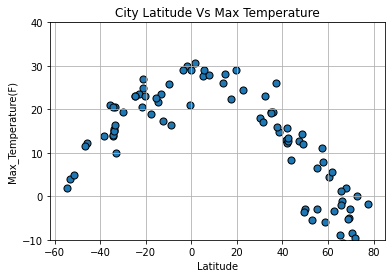

In [39]:
city_df.plot(kind="scatter", x="Latitude", y="Max_Temperature(F)", xlim = (-62, 85), 
                     ylim= (-10, 40), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Max Temperature")
plt.savefig("../Images/LatitudeVsMaxTemp.png")
plt.show()
# Temperature is highest near the equator; temperature decreases,0 as we go away from equator.

### Latitude vs. Humidity Plot

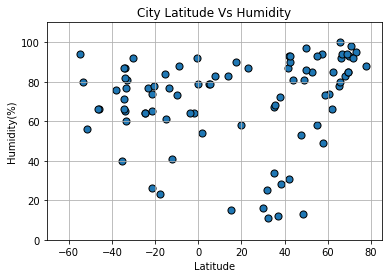

In [45]:
city_df.plot(kind="scatter", x="Latitude", y="Humidity(%)", xlim = (-70, 85), 
                     ylim= (0, 110), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Humidity")
plt.savefig("../Images/LatitudeVsHumidity.png")
plt.show()
# Higher Humidity is observed towards the north of equator

### Latitude vs. Cloudiness Plot

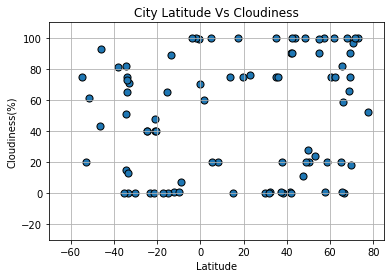

In [47]:
city_df.plot(kind="scatter", x="Latitude", y="Cloudiness(%)", xlim = (-70, 85), 
                     ylim= (-30, 110), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Cloudiness")
plt.savefig("../Images/LatitudeVsCloudiness.png")
plt.show()
# Unable to draw any common inference between the latitudes and cloudiness

### Latitude vs. Wind Speed Plot

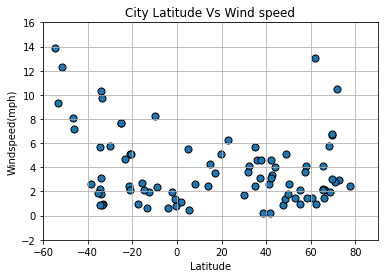

In [52]:
city_df.plot(kind="scatter", x="Latitude", y="Windspeed(mph)", xlim = (-60, 90), 
                     ylim= (-2, 16), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Wind speed")
plt.savefig("../Images/LatitudeVsWindSpeed.png")
plt.show()
# Wind speed is the lowest around the equator and increases as we progress towards the poles

## Linear Regression

### Write linear regression plot function (optional)

In [57]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = city_df.loc[city_df["Latitude"] >= 0]
northern_hem
southern_hem = city_df.loc[city_df["Latitude"] < 0]
# Linear regression
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
# Call an function #1
equation = linear_regression(northern_hem["Latitude"], northern_hem["Max_Temperature(F)"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max_Temperature(F)")

# Save the figure
plt.savefig("../Images/NorthernHem_MaxTemp_vs_Lat.png")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'st' is not defined

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression